# Лабораторная работа №4
_Анализ и визуализация данных в Python_

Для начала о том, как пользоваться интерактивным блокнотом. Код помещается в ячейки, для выполнения кода в ячейке нужно кликнуть в ней мышкой, чтобы она выделилась, и нажать Shift-Enter. Поэкспериментируйте на ячейке ниже:

In [1]:
1+1

2

Если в ячейке находятся несколько выражений, то результатом выполнения ячейки будет результат последнего выражения в ней:

In [2]:
1+1
1+2

3

Теперь перейдём к работе с наборами данных при помощи бибилиотеки pandas

## Pandas
Для того, чтобы начать работать с pandas, как и всегда в python, его нужно импортировать. Обычно это делают так:

In [3]:
import pandas as pd

Теперь попробуем загрузить набор данных. Для примера возьмём titanic.csv из каталога datasets, который можно загрузить при помощи функции read_csv:

In [4]:
data = pd.read_csv('datasets/titanic.csv')

Взглянем на загруженные данные

In [5]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Можно попробовать найти в этих данных что-нибудь интересное. Например, посчитаем, какое количество мужчин и женщин было на корабле. Информация об этом хранится в столбце Sex, доступ к которому можно получить следующими способами

In [6]:
data.Sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

или

In [7]:
data['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

Чтобы посчитать количество мужчин и женщин воспользуемся методом value_counts:

In [8]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

Можем также получить процентное соотношение, указав флаг normalize:

In [9]:
data.Sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

Можем определить среднюю цену билета, обратившись к столбцу Fare и воспользовавшись методом mean:

In [10]:
data.Fare.mean()

32.2042079685746

Из нашего набора данных можно построить новый, выбрав только нужные столбцы при помощи свойства loc, например

In [11]:
new_data = data.loc[:,['Name', 'Age']]
new_data

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
886,"Montvila, Rev. Juozas",27.0
887,"Graham, Miss. Margaret Edith",19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,"Behr, Mr. Karl Howell",26.0


Можно отфильтровать только выживших

In [12]:
survived = new_data[data.Survived==1]
survived

,Name,Age
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0
...,...,...
875,"Najib, Miss. Adele Kiamie ""Jane""",15.0
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0
880,"Shelley, Mrs. William (Imanita Parrish Hall)",25.0
887,"Graham, Miss. Margaret Edith",19.0


Полученный набор данных можно экспортировать обратно в csv функцией to_csv:

In [13]:
survived.to_csv('survived.csv', index=False)

## Numpy
Numpy -- это библиотека для работы с массивами в Python. Список из стандартной библиотеки не достаточно производителен и имеет достаточно скудный интерфейс, чтобы использовать его для научных вычислений. Начнём с импорта библиотеки, который обычно записывают так:

In [14]:
import numpy as np

Создадим массив

In [15]:
arr = np.array([1,2,3,4])

Ровно как и с питоновскими списками можно получать элемент по индексу и делать слайсы:

In [16]:
arr[0]

1

In [17]:
arr[2:]

array([3, 4])

Но можно и доставать элементы по спи

А можно сделать из него матрицу 2x2:

In [18]:
m = arr.reshape((2,2))
m

array([[1, 2],
       [3, 4]])

Можно транспонировать эту матрицу

In [19]:
m.T

array([[1, 3],
       [2, 4]])

Вот так можно получить доступ к первой строке матрицы

In [20]:
m[0]

array([1, 2])

А вот так -- ко второму столбцу:

In [21]:
m[:,1]

array([2, 4])

Но самое интересное -- это применение операции ко всему массиву сразу. Например:

In [22]:
a = arr * 2
a

array([2, 4, 6, 8])

In [23]:
b = arr + 1
b

array([2, 3, 4, 5])

Можно даже применять арифметические операции для двух массивов поэлементно, при условии, что их размеры совпадают:

In [24]:
a + b

array([ 4,  7, 10, 13])

In [25]:
a - b

array([0, 1, 2, 3])

In [26]:
a * b

array([ 4, 12, 24, 40])

In [27]:
a / b

array([1.        , 1.33333333, 1.5       , 1.6       ])

In [28]:
a ** b

array([    4,    64,  1296, 32768], dtype=int32)

Для нахождения скалярного произведения двух векторов есть оператор @

In [29]:
a @ b

80

Он же отвечает за умножение матрицы на вектор и перемножение матриц по правилу строка на столбец:

In [30]:
m @ a[:2]

array([10, 22])

In [31]:
m @ m

array([[ 7, 10],
       [15, 22]])

Также массив позволяет находить статистические характеристики

In [32]:
arr.sum(), arr.mean(), arr.std()

(10, 2.5, 1.118033988749895)

Можно фильтровать элементы массива по условию

In [33]:
arr[arr < 3]

array([1, 2])

## Matplotlib
Для визуализации данных в python есть пакет matplotlib. Обычно его импортируют так:

In [34]:
from matplotlib import pyplot as plt
%matplotlib inline

Вторая строчка нужна для того, чтобы графики отображались прямо в блокноте, а не в отдельном окне. Давайте что-нибудь построим:

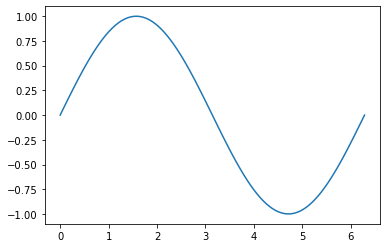

In [35]:
x = np.linspace(0, 2*np.pi, 100)
plt.plot(x, np.sin(x))
plt.show()

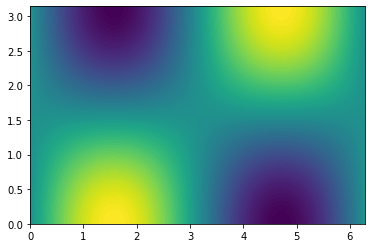

In [36]:
x = np.linspace(0, 2*np.pi, 100)
y = np.linspace(0, np.pi, 50)
xx, yy = np.meshgrid(x, y)
zz = np.sin(xx) * np.cos(yy)
plt.contourf(xx, yy, zz, levels=100)
plt.show()

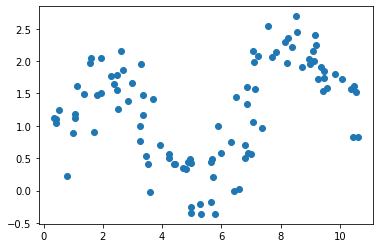

In [37]:
x = np.linspace(0, 10, 100)
y = np.sin(x) + 0.1 * x
plt.scatter(x + np.random.rand(*x.shape), y + np.random.rand(*x.shape))
plt.show()

## Scikit-learn
А теперь немного машинного обучения со scikit-learn. Рассмотрим примеры задач классификации с использованием решающих деревьев, метода k ближайших соседей, а также линейную регрессию.

### Решающие деревья
Рассмотрим знакомый уже нам набор данных о пассажирах титаника. Будем решать на них задачу классификации, в которой по различным характеристикам пассажиров требуется предсказать, кто из них выжил после крушения корабля и на основании полученной модели определим наиболее важные для выживания признаки.

Для начала импортируем классификатор

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
clf = DecisionTreeClassifier()

Теперь подготовим данные. Для начала импортируем их и оставим только такие признаки как пол, класс, цена билета и возраст. В качестве целевой переменной у нас будет факт выживания:

In [40]:
data = pd.read_csv('datasets/titanic.csv')
interesting = data.loc[:, ['Sex', 'Pclass', 'Fare', 'Age', 'Survived']]

Обратим внимание, что имеются пропуски в данных. Избавимся от них, удалив соответствующие строки

In [41]:
interesting.dropna(inplace=True)

Теперь отделим признаки от целевой переменной

In [42]:
X = interesting.iloc[:, :-1]
y = interesting.iloc[:, -1]

Заметим, что столбец Sex содержит текстовые данные и преобразуем их к числовым

In [43]:
X.Sex = X.Sex.map(lambda x: 0 if x == 'female' else 1)

Обучим классификатор

In [44]:
clf.fit(X, y)

DecisionTreeClassifier()

Посмотрим на его результаты на обучающей выборке

In [45]:
prediction = clf.predict(X)

и определим долю правильных ответов

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y, prediction)

0.9845938375350141

### Метод k ближайших соседей
Сейчас мы будем подбирать оптимальное значение k для алгоритма kNN. Будем использовать набор данных Wine, где требуется предсказать сорт винограда, из которого изготовлено вино, используя результаты химических анализов

Начинаем с импорта классификатора

In [47]:
from sklearn.neighbors import KNeighborsClassifier

Загрузим данные

In [48]:
data = pd.read_csv('datasets/wine.csv', header=None)

Класс записан в первом столбце (три варианта), признаки — в столбцах со второго по последний.

In [49]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

Для данного метода настраиваемым параметром является количество ближайших соседей k. Для определения качества классификации и оптимального количества соседей будем рассчитывать точность классификации на кросс-валидации для количества соседей в диапазоне от 1 до 50.

Создадим генератор разбиений для проведения кросс-валидации

In [50]:
from sklearn.model_selection import KFold
cv = KFold(y.size, n_splits=5, shuffle=True)

И с помощью GridSearchCV будем искать оптимальное значение k

In [51]:
from sklearn.model_selection import GridSearchCV

grid = {'n_neighbors': np.arange(50) + 1}
clf = KNeighborsClassifier()
gs = GridSearchCV(clf, grid, scoring='accuracy', cv=cv)
gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=178, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             scoring='accuracy')

Оптимальное значение количества соседей

In [52]:
gs.best_params_

{'n_neighbors': 1}

А точность при этом

In [53]:
gs.best_score_

0.7696629213483146

### Логистическая регрессия

Ещё одним способом классификации, несмотря на слово "регрессия" в названии, является логистическая регрессия. Одной из ее особенностей является возможность оценивания вероятностей классов, тогда как большинство линейных классификаторов могут выдавать только номера классов.

Загрузим данные:

In [54]:
data = pd.read_csv('datasets/data-logistic.csv', header=None)
data

,0,1,2
0,-1,-0.663827,-0.138526
1,1,1.994596,2.468025
2,-1,-1.247395,0.749425
3,1,2.309374,1.899836
4,1,0.849143,2.407750
...,...,...,...
200,1,4.245176,3.053931
201,1,2.437935,1.357804
202,-1,-1.876638,1.533398
203,1,-6.824446,-13.934211


Импортируем классификатор

In [55]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=0.1)

Обучим классификатор

In [56]:
clf.fit(data.iloc[:,1:], data.iloc[:,0])

LogisticRegression(C=0.1)

Визуализируем результат

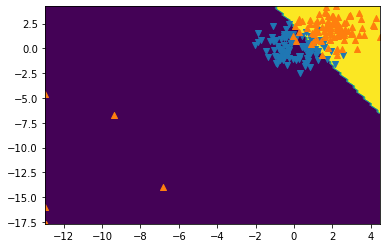

In [57]:
xx,yy = np.meshgrid(np.linspace(data.iloc[:,1].min(), data.iloc[:,1].max(), 100),
                    np.linspace(data.iloc[:,2].min(), data.iloc[:,2].max(), 100))
zz = clf.predict(np.column_stack((xx.ravel(), yy.ravel())))
zz = zz.reshape(xx.shape)
plt.contourf(xx, yy, zz, levels=100)
plt.scatter(data[data[0]==-1].iloc[:,1], data[data[0]==-1].iloc[:,2], marker='v')
plt.scatter(data[data[0]==1].iloc[:,1], data[data[0]==1].iloc[:,2], marker='^')

Определим качество классификации при помощи метрики ROC-AUC:

In [58]:
from sklearn.metrics import roc_auc_score
roc_auc_score(data[0], clf.predict(data.iloc[:, 1:]))

0.8873809523809524

### Линейная регрессия
А сейчас мы будем предсказывать зарплату по описанию вакансии! Начнём с загрузки данных

In [59]:
data = pd.read_csv('datasets/salary-train.csv')
data

,FullDescription,LocationNormalized,ContractTime,SalaryNormalized
0,International Sales Manager London ****k ****...,London,permanent,33000
1,An ideal opportunity for an individual that ha...,London,permanent,50000
2,Online Content and Brand Manager// Luxury Reta...,South East London,permanent,40000
3,A great local marketleader is seeking a perman...,Dereham,permanent,22500
4,Registered Nurse / RGN Nursing Home for Young...,Sutton Coldfield,NaN,20355
...,...,...,...,...
59995,"As a result of continued growth, First Class S...",Whitley Bay,contract,26400
59996,PHP / MVC Web Developer MacclesfieldCirca ***...,Macclesfield,permanent,26000
59997,"Staff Nurse, Nursing Home, Baldock White Recru...",Baldock,NaN,24500
59998,This is one of the best agency side opportunit...,The City,permanent,65000


Подготовим данные. Для начала преобразуем все слова в столбце FullDescription в нижний регистр и заменим все спецсимволы на пробелы

In [60]:
data.FullDescription = data.FullDescription.str.lower()
data.FullDescription = data.FullDescription.replace('[^a-zA-Z0-9]', ' ', regex = True)

Теперь заменим все пропущенные данные в столбцах LocationNormalized и ContractTime на 'nan':

In [61]:
data['LocationNormalized'].fillna('nan', inplace=True)
data['ContractTime'].fillna('nan', inplace=True)

Теперь нам нужно преобразовать текст из столбца FullDescription в набор признаков. Одним из способов это сделать является TfidVectorizer.

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(min_df=5)
X_train_tfid = tfid.fit_transform(data.FullDescription)

Чтобы представить в виде набора числовых признаков содержимое столбцов LocationNormalized и ContractTime воспользуемся DictVectorizer

In [63]:
from sklearn.feature_extraction import DictVectorizer
enc = DictVectorizer()
X_train_categ = enc.fit_transform(data[['LocationNormalized', 'ContractTime']].to_dict('records'))

Объединим матрицы признаков

In [64]:
from scipy.sparse import hstack
X = hstack((X_train_categ, X_train_tfid))

Обучим на этих признаках регрессор

In [65]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=1)
reg.fit(X, data.SalaryNormalized)

Ridge(alpha=1)

Загрузим и преобразуем тестовые данные тем же образом

In [66]:
test = pd.read_csv('datasets/salary-test-mini.csv')
test.FullDescription = test.FullDescription.str.lower()
test.FullDescription = test.FullDescription.replace('[^a-zA-Z0-9]', ' ', regex = True)
test

,FullDescription,LocationNormalized,ContractTime,SalaryNormalized
0,we currently have a vacancy for an hr project ...,Milton Keynes,contract,NaN
1,a web developer opportunity has arisen with an...,Manchester,permanent,NaN


Выделим признаки и получим предсказания зарплат

In [67]:
X_test_tfid = tfid.transform(test.FullDescription)
X_test_categ = enc.transform(test[['LocationNormalized', 'ContractTime']].to_dict('records'))
X_test = hstack((X_test_categ, X_test_tfid))

test.SalaryNormalized = reg.predict(X_test)
test

,FullDescription,LocationNormalized,ContractTime,SalaryNormalized
0,we currently have a vacancy for an hr project ...,Milton Keynes,contract,56578.434708
1,a web developer opportunity has arisen with an...,Manchester,permanent,37135.276953


Задача 1. Определить долю выживших и определите 2 наиболее важных признака для выживания при помощи DecisionTreeСlassifier на основе данных из datasets/titanic.csv.

In [68]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
clf = DecisionTreeClassifier()

data = pd.read_csv('datasets/titanic.csv')
data2 = data.loc[:, ['Survived']]
print(data2)

#Количество выживших
survived_count = np.sum(data2)

#Доля выживших
survived = survived_count/891
print(survived)

#Отбор 2-х признаков
data3 = data.loc[:, ['Sex', 'Pclass', 'Fare', 'Age', 'Survived']]
data3.dropna(inplace=True)
X = data3.iloc[:, :-1]
y = data3.iloc[:, -1]
X.Sex = X.Sex.map(lambda x: 0 if x == 'female' else 1)

model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

     Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]
Survived    0.38427
dtype: float64
[0.28877803 0.13169433 0.27617383 0.30335382]


Задача 2. Для задачи о классификации вина методом ближайших соседей произведите масштабирование признаков с помощью функции sklearn.preprocessing.scale. Снова найдите оптимальное k на кросс-валидации. Помогло ли масштабирование?

In [70]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn
data = pd.read_csv('datasets/wine.csv', header=None)

X = data.iloc[:, 1:]
y = data.iloc[:, 0]

#Проведем масштабирование факторов
X = sklearn.preprocessing.scale(X)

from sklearn.model_selection import KFold
cv = KFold(y.size, n_splits=5, shuffle=True)

from sklearn.model_selection import GridSearchCV

grid = {'n_neighbors': np.arange(50) + 1}
clf = KNeighborsClassifier()
gs = GridSearchCV(clf, grid, scoring='accuracy', cv=cv)
gs.fit(X, y)

gs.best_params_
gs.best_score_

0.9831460674157303

Масштабирование помогло. Результат увеличился.

Задание 3. Определить качество линейной регрессии в примере с зарплатами при помощи метрики r2_score.

In [83]:
from sklearn.metrics import r2_score
data = pd.read_csv('datasets/salary-train.csv')
data

data.FullDescription = data.FullDescription.str.lower()
data.FullDescription = data.FullDescription.replace('[^a-zA-Z0-9]', ' ', regex = True)

data['LocationNormalized'].fillna('nan', inplace=True)
data['ContractTime'].fillna('nan', inplace=True)

from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(min_df=5)
X_train_tfid = tfid.fit_transform(data.FullDescription)

from sklearn.feature_extraction import DictVectorizer
enc = DictVectorizer()
X_train_categ = enc.fit_transform(data[['LocationNormalized', 'ContractTime']].to_dict('records'))

from scipy.sparse import hstack
X = hstack((X_train_categ, X_train_tfid))

from sklearn.linear_model import Ridge
reg = Ridge(alpha=1)
reg.fit(X, data.SalaryNormalized)

test = pd.read_csv('datasets/salary-train.csv')
test.FullDescription = test.FullDescription.str.lower()
test.FullDescription = test.FullDescription.replace('[^a-zA-Z0-9]', ' ', regex = True)
test

X_test_tfid = tfid.transform(test.FullDescription)
X_test_categ = enc.transform(test[['LocationNormalized', 'ContractTime']].to_dict('records'))
X_test = hstack((X_test_categ, X_test_tfid))

test.SalaryNormalized = reg.predict(X_test)
test

out = sklearn.metrics.r2_score(data.SalaryNormalized,test.SalaryNormalized)
print(data.SalaryNormalized)

0.7282307400430987


Индивидуальное задание: Для данных europe.csv постройте модель зависимости качества жизни (Life.expect) от остальных факторов, исключая название страны. Используя метрику r2_score, оцените качество построенной модели.

In [228]:
from sklearn.metrics import r2_score
data = pd.read_csv('datasets/europe.csv')
data['Area'].fillna('nan', inplace=True)
data['GDP'].fillna('nan', inplace=True)
data['Inflation'].fillna('nan', inplace=True)
data['Military'].fillna('nan', inplace=True)
data['Pop.growth'].fillna('nan', inplace=True)
data['Unemployment'].fillna('nan', inplace=True)

from sklearn.feature_extraction import DictVectorizer
enc = DictVectorizer()
X_train_categ = enc.fit_transform(data[['Area', 'GDP', 'Inflation', 'Military', 'Pop.growth', 'Unemployment']].to_dict('records'))

X = X_train_categ

from sklearn.linear_model import Ridge
reg = Ridge(alpha=1)
reg.fit(X, data.Lifeexpect)

test = pd.read_csv('datasets/europe.csv')

X_test_categ = enc.transform(test[['Area', 'GDP', 'Inflation', 'Military', 'Pop.growth', 'Unemployment']].to_dict('records'))
X_test = X_test_categ

test.Lifeexpect = reg.predict(X_test)


out = sklearn.metrics.r2_score(data.Lifeexpect,test.Lifeexpect)
print(out)


0.4971703586565013
